# Fig 1 - Introduce variable doses

For median of 1000 runs:

- X axis years
- Y axis: DS/ yield/ econ (and or cumulative?)

For different doses and N sprays

Check if mutation prop important!

FIG
9 panels (3x3):
- Col N: N sprays, doses vary
- Rows: DS/yield/econ

## Required data:

Figure 1 needs df based on scan over:

`Sprays = 1,2,3`

`doses = 0.1,0.2,...,1`

`years=0,1,...,15`

With columns:

- `sprays`
- `dose`
- `year`
- `run`
- `yield_vec`
- `dis_sev`
- `econ`

<!-- - `fung_mean_start`
- `fung_var_start`
- `fung_mean_end`
- `fung_var_end` -->


In [40]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import pandas as pd

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px



from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    get_text_annotation,
)

# from poly2.utils import get_dist_mean, edge_values
# from poly2.run import simulations_run, no_joblib_simulations_run
# from poly2.config import Config

In [57]:
COLZ = sns.color_palette('muted').as_hex()

# Plot

In [58]:
df_use = pd.read_csv('../outputs/combined/fig2/fig2.csv').drop('Unnamed: 0', axis=1)

df_use.head()

,sprays,dose,year,sev,yld,econ
0,1,0.1,1,13.299884,9.353483,1082.427052
1,1,0.1,2,13.683337,9.320847,1078.604007
2,1,0.1,3,13.851075,9.306620,1076.937497
3,1,0.1,4,13.866648,9.305301,1076.782968
4,1,0.1,5,13.329089,9.350992,1082.135219


## Fig fn

In [69]:
def fig2(df):
    
    fig = make_subplots(
        rows=3,
        cols=3,
        shared_xaxes=True,
        shared_yaxes=True,
        horizontal_spacing=0.14,
        # vertical_spacing=0.12,
    )
    
    # len 10    
    colors = px.colors.sequential.Viridis
    
    for spray in [1,2,3]:
        by_spray = df.loc[df.sprays==spray]
        
        for ind, dose in enumerate(by_spray.dose.unique()):
            
            by_spray_and_dose = by_spray.loc[lambda dd: dd.dose==dose]
            
            col_this_dose = colors[ind]
            
            name_this_dose = f'Dose={dose:.1f}'
            
            
            
            
            t_d = go.Scatter(
                    x=by_spray_and_dose.year,
                    y=by_spray_and_dose.sev,
                    mode='lines',
                    name=name_this_dose,
                    line=dict(color=col_this_dose),
                    showlegend=(spray==1),
                )

            fig.add_trace(t_d, row=1, col=spray)
            
            
            
            
            t_y = go.Scatter(
                    x=by_spray_and_dose.year,
                    y=by_spray_and_dose.yld,
                    mode='lines',
                    line=dict(color=col_this_dose),
                    showlegend=False,
                )

            fig.add_trace(t_y, row=2, col=spray)
            
            
            
            
            t_e = go.Scatter(
                    x=by_spray_and_dose.year,
                    y=by_spray_and_dose.econ,
                    mode='lines',
                    line=dict(color=col_this_dose),
                    showlegend=False,
                )

            fig.add_trace(t_e, row=3, col=spray)
    
    
    
    
    
    fig.update_layout(standard_layout(True, height=800))
    
    fig.update_layout(legend=dict(x=0, y=1.20, orientation='h', font=dict(size=12)))
    
    corners = corner_annotations_colwise(
        3, 3,
        1.05, 0,
        0.364, 0.38
    )
    
    label_y = 1.05
    
    annotz = corners + [
        get_text_annotation(
            0.12, label_y,
            '1 spray',
            xanchor='center',
            yanchor='middle',
        ),
        get_text_annotation(
            0.53, label_y,
            '2 sprays',
            xanchor='center',
            yanchor='middle',
        ),
        get_text_annotation(
            0.89, label_y,
            '3 sprays',
            xanchor='center',
            yanchor='middle',
        ),
    ]
    
    fig.update_layout(annotations=annotz)
    
    # X axis    
    
    xrange = [0,15]
    
    fig.update_xaxes(title_text='Time (years)',
                     row=3, col=1,
                     range=xrange,
                     showgrid=False)

    fig.update_xaxes(title_text='Time (years)',
                     row=3, col=2,
                     range=xrange,
                     showgrid=False)

    fig.update_xaxes(title_text='Time (years)',
                     range=xrange,
                     row=3, col=3,
                     showgrid=False)
    
    # Y axis    
    fig.update_yaxes(title_text='Disease severity (%)',
                     range=[-0.5, 16],
                     row=1, col=1,
                     showgrid=False)
    
    fig.update_yaxes(title_text='Yield (ton/ha)',
                         range=[9, 10.6],
                         row=2, col=1,
                         showgrid=False)
    
    fig.update_yaxes(title_text='Economic yield (£)',
                     range=[960, 1175],
                     row=3, col=1,
                     showgrid=False)

    return fig

## FIG

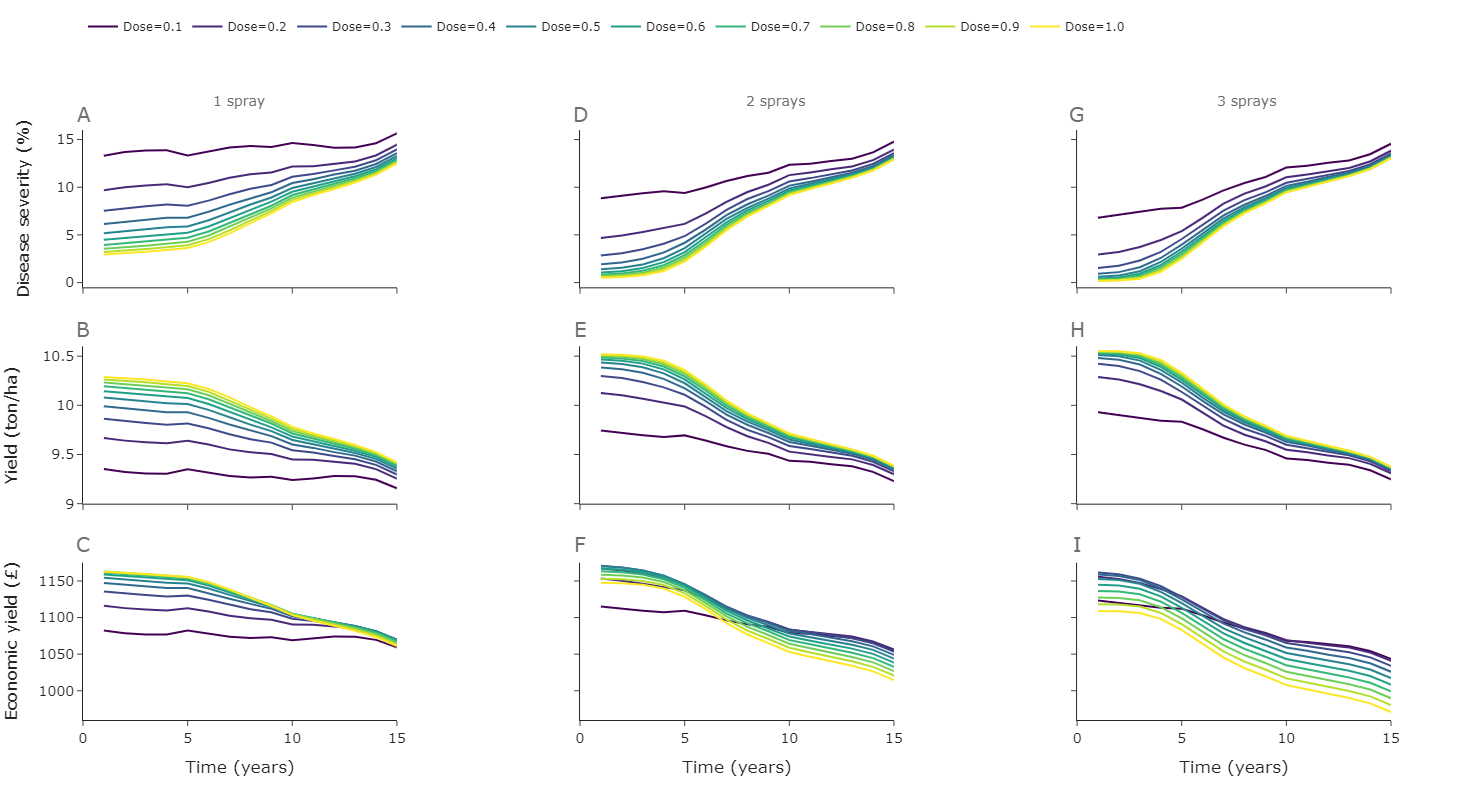

In [70]:
f = fig2(df_use)

f.show()

In [71]:
f.write_image('../figures/paper/fig2.png')